In [9]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

Loading audio files...

✓ Total audio files found: 1440
✓ Emotion distribution:
emotion
disgust      192
calm         192
sad          192
happy        192
angry        192
fearful      192
surprised    192
neutral       96
Name: count, dtype: int64


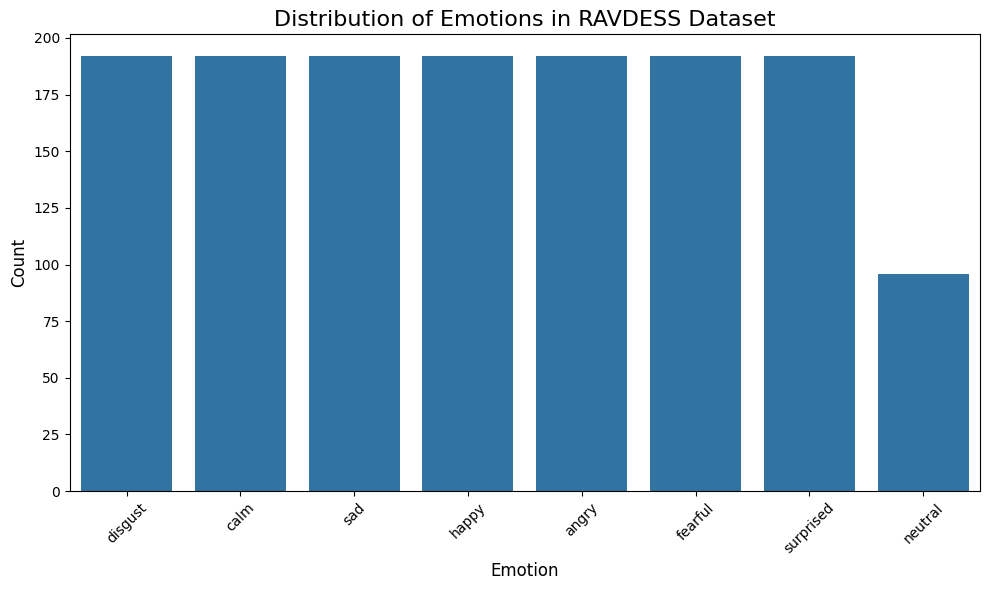


✓ Sample audio: 03-01-07-02-01-02-20.wav
✓ Emotion: disgust
✓ Sample rate: 22050 Hz
✓ Duration: 3.00 seconds


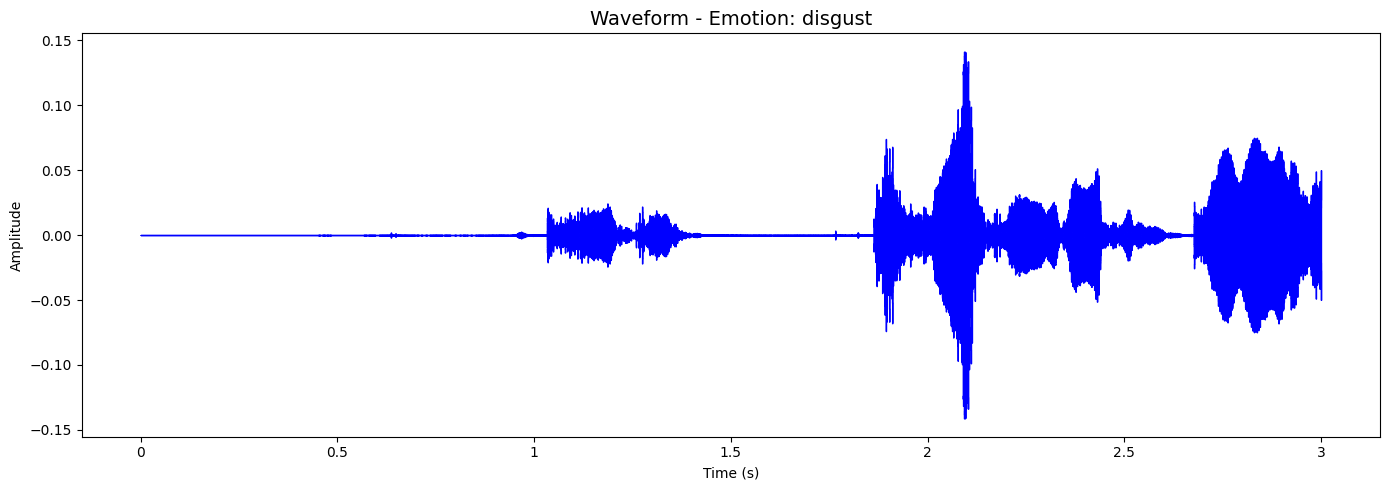


✓ Data exploration complete!


In [11]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# CHUNK 2: DATA EXPLORATION AND PREPROCESSING
# =============================================
# Understanding the RAVDESS dataset structure and extracting features

# RAVDESS filename format: 03-01-06-01-02-01-12.wav
# Modality-Channel-Emotion-Intensity-Statement-Repetition-Actor

# Emotion labels in RAVDESS:
# 01 = neutral, 02 = calm, 03 = happy, 04 = sad
# 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised

emotion_dict = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# Set your dataset path (adjust this based on where you uploaded the files)
DATASET_PATH = '/content/RAVDESS'

def extract_emotion_from_filename(filename):
    """Extract emotion label from RAVDESS filename"""
    emotion_code = filename.split('-')[2]
    return emotion_dict.get(emotion_code, 'unknown')

def load_audio_files(dataset_path):
    """Load all audio file paths and their emotions"""
    audio_files = []
    emotions = []

    # Walk through all directories
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(root, file)
                emotion = extract_emotion_from_filename(file)

                audio_files.append(file_path)
                emotions.append(emotion)

    return audio_files, emotions

# Load dataset
print("Loading audio files...")
audio_paths, emotion_labels = load_audio_files(DATASET_PATH)

print(f"\n✓ Total audio files found: {len(audio_paths)}")
print(f"✓ Emotion distribution:")

# Create dataframe for better visualization
df = pd.DataFrame({'path': audio_paths, 'emotion': emotion_labels})
print(df['emotion'].value_counts())

# Visualize emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index)
plt.title('Distribution of Emotions in RAVDESS Dataset', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Let's listen to and visualize one sample
if len(audio_paths) > 0:
    sample_path = audio_paths[0]
    sample_emotion = emotion_labels[0]

    # Load audio
    audio, sr = librosa.load(sample_path, duration=3)

    print(f"\n✓ Sample audio: {os.path.basename(sample_path)}")
    print(f"✓ Emotion: {sample_emotion}")
    print(f"✓ Sample rate: {sr} Hz")
    print(f"✓ Duration: {len(audio)/sr:.2f} seconds")

    # Visualize waveform
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(audio, sr=sr, color='blue') # Added color='blue'
    plt.title(f'Waveform - Emotion: {sample_emotion}', fontsize=14)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

print("\n✓ Data exploration complete!")

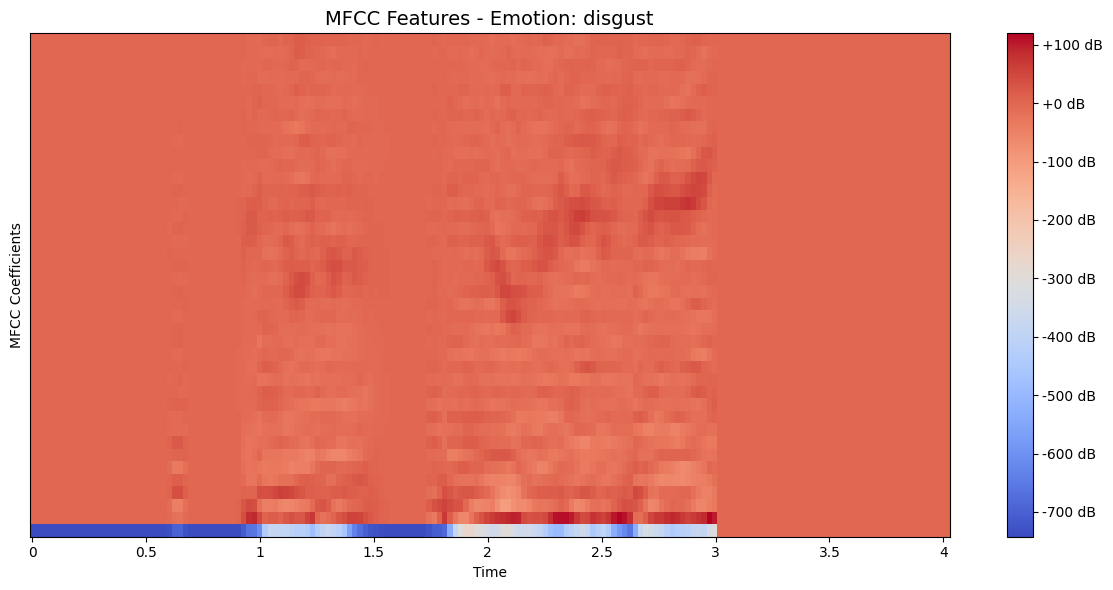

✓ MFCC shape: (40, 174)
✓ Shape explanation: (40 coefficients, 174 time frames)

Extracting features from all audio files...
This may take several minutes...
Processing: 0/1440
Processing: 100/1440
Processing: 200/1440
Processing: 300/1440
Processing: 400/1440
Processing: 500/1440
Processing: 600/1440
Processing: 700/1440
Processing: 800/1440
Processing: 900/1440
Processing: 1000/1440
Processing: 1100/1440
Processing: 1200/1440
Processing: 1300/1440
Processing: 1400/1440

✓ Feature extraction complete!
✓ Features shape: (1440, 40, 174)
✓ Labels shape: (1440,)
✓ Total samples: 1440

✓ Features saved to disk!


In [12]:
# CHUNK 3: FEATURE EXTRACTION
# ============================
# Extract MFCC (Mel-Frequency Cepstral Coefficients) features from audio

# MFCC is the most common feature for speech emotion recognition
# It captures the power spectrum of sound, similar to how humans hear

def extract_mfcc(file_path, max_pad_len=174):
    """
    Extract MFCC features from audio file

    Parameters:
    - file_path: path to audio file
    - max_pad_len: maximum length to pad/truncate (for uniform input size)

    Returns:
    - mfcc features as numpy array
    """
    try:
        # Load audio file
        audio, sr = librosa.load(file_path, duration=3, sr=22050)

        # Extract MFCC features (13 coefficients)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)

        # Pad or truncate to fixed length
        if mfcc.shape[1] < max_pad_len:
            pad_width = max_pad_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_pad_len]

        return mfcc

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Visualize MFCC for a sample
if len(audio_paths) > 0:
    sample_mfcc = extract_mfcc(audio_paths[0])

    plt.figure(figsize=(12, 6))
    librosa.display.specshow(sample_mfcc, sr=22050, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'MFCC Features - Emotion: {emotion_labels[0]}', fontsize=14)
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    plt.tight_layout()
    plt.show()

    print(f"✓ MFCC shape: {sample_mfcc.shape}")
    print("✓ Shape explanation: (40 coefficients, 174 time frames)")

# Extract features for all audio files
print("\nExtracting features from all audio files...")
print("This may take several minutes...")

X = []  # Features
y = []  # Labels

for i, (path, emotion) in enumerate(zip(audio_paths, emotion_labels)):
    if i % 100 == 0:
        print(f"Processing: {i}/{len(audio_paths)}")

    mfcc = extract_mfcc(path)
    if mfcc is not None:
        X.append(mfcc)
        y.append(emotion)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print(f"\n✓ Feature extraction complete!")
print(f"✓ Features shape: {X.shape}")
print(f"✓ Labels shape: {y.shape}")
print(f"✓ Total samples: {len(X)}")

# Save features (optional, to avoid re-extracting)
np.save('/content/X_features.npy', X)
np.save('/content/y_labels.npy', y)
print("\n✓ Features saved to disk!")

Emotion Label Mapping:
0 -> angry
1 -> calm
2 -> disgust
3 -> fearful
4 -> happy
5 -> neutral
6 -> sad
7 -> surprised

✓ Original label shape: (1440,)
✓ One-hot encoded shape: (1440, 8)
✓ Number of classes: 8

✓ Reshaped features: (1440, 40, 174, 1)
✓ Shape explanation: (samples, 40 MFCC coeffs, 174 time frames, 1 channel)

✓ Training set: 1152 samples
✓ Validation set: 144 samples
✓ Test set: 144 samples

✓ Data normalization complete!
✓ Data is ready for model training!


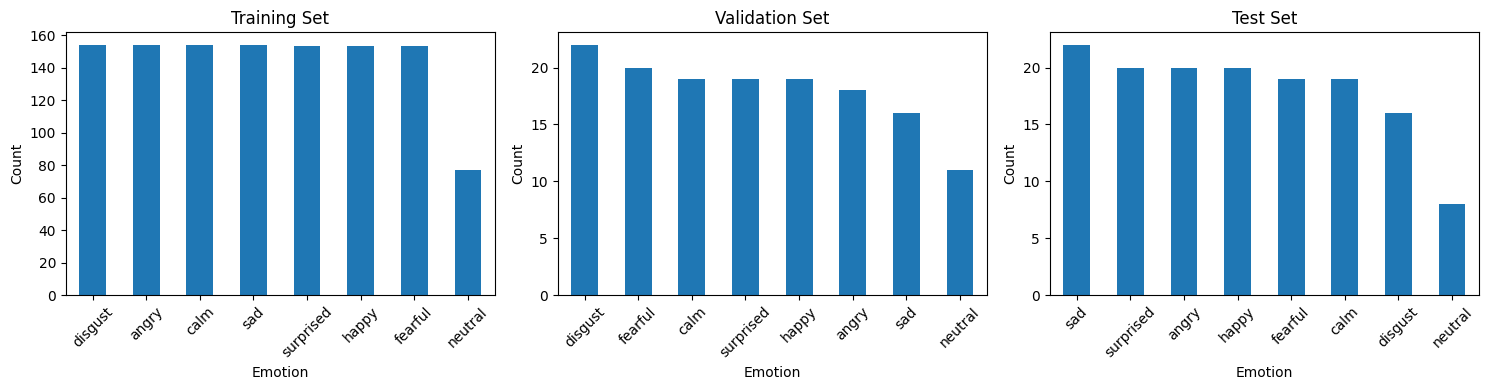


✓ Data preparation complete! Ready to build the model.


In [13]:
# CHUNK 4: DATA PREPARATION
# ==========================
# Prepare data for training: encoding labels, splitting dataset

# Load features if you saved them (or skip if running continuously)
# X = np.load('/content/X_features.npy')
# y = np.load('/content/y_labels.npy')

# Encode emotion labels to numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Emotion Label Mapping:")
for i, emotion in enumerate(label_encoder.classes_):
    print(f"{i} -> {emotion}")

# Convert to one-hot encoding (required for classification)
num_classes = len(label_encoder.classes_)
y_one_hot = keras.utils.to_categorical(y_encoded, num_classes=num_classes)

print(f"\n✓ Original label shape: {y_encoded.shape}")
print(f"✓ One-hot encoded shape: {y_one_hot.shape}")
print(f"✓ Number of classes: {num_classes}")

# Reshape X for CNN input (add channel dimension)
# CNN expects: (samples, height, width, channels)
X_reshaped = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

print(f"\n✓ Reshaped features: {X_reshaped.shape}")
print("✓ Shape explanation: (samples, 40 MFCC coeffs, 174 time frames, 1 channel)")

# Split data: 80% training, 10% validation, 10% testing
X_train, X_temp, y_train, y_temp = train_test_split(
    X_reshaped, y_one_hot, test_size=0.2, random_state=42, stratify=y_encoded
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(f"\n✓ Training set: {X_train.shape[0]} samples")
print(f"✓ Validation set: {X_val.shape[0]} samples")
print(f"✓ Test set: {X_test.shape[0]} samples")

# Normalize features (important for neural networks)
# Using mean and std from training set only
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0) + 1e-10  # Add small value to avoid division by zero

X_train_norm = (X_train - mean) / std
X_val_norm = (X_val - mean) / std
X_test_norm = (X_test - mean) / std

print("\n✓ Data normalization complete!")
print("✓ Data is ready for model training!")

# Visualize class distribution in splits
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, data, title in zip(axes,
                           [y_train, y_val, y_test],
                           ['Training Set', 'Validation Set', 'Test Set']):
    # Convert one-hot back to labels for visualization
    labels = np.argmax(data, axis=1)
    emotions = [label_encoder.classes_[i] for i in labels]

    pd.Series(emotions).value_counts().plot(kind='bar', ax=ax)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Emotion')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n✓ Data preparation complete! Ready to build the model.")

MODEL ARCHITECTURE


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 40, 174, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 40, 174, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 20, 87, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 87, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 87, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20, 87, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 43, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 43, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 43, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 43, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 21, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 21, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 26880)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,881,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,288,456 (27.80 MB)

 Trainable params: 7,286,792 (27.80 MB)

 Non-trainable params: 1,664 (6.50 KB)


✓ Model built and compiled successfully!
✓ Total parameters: 7,288,456

✓ Model architecture diagram:


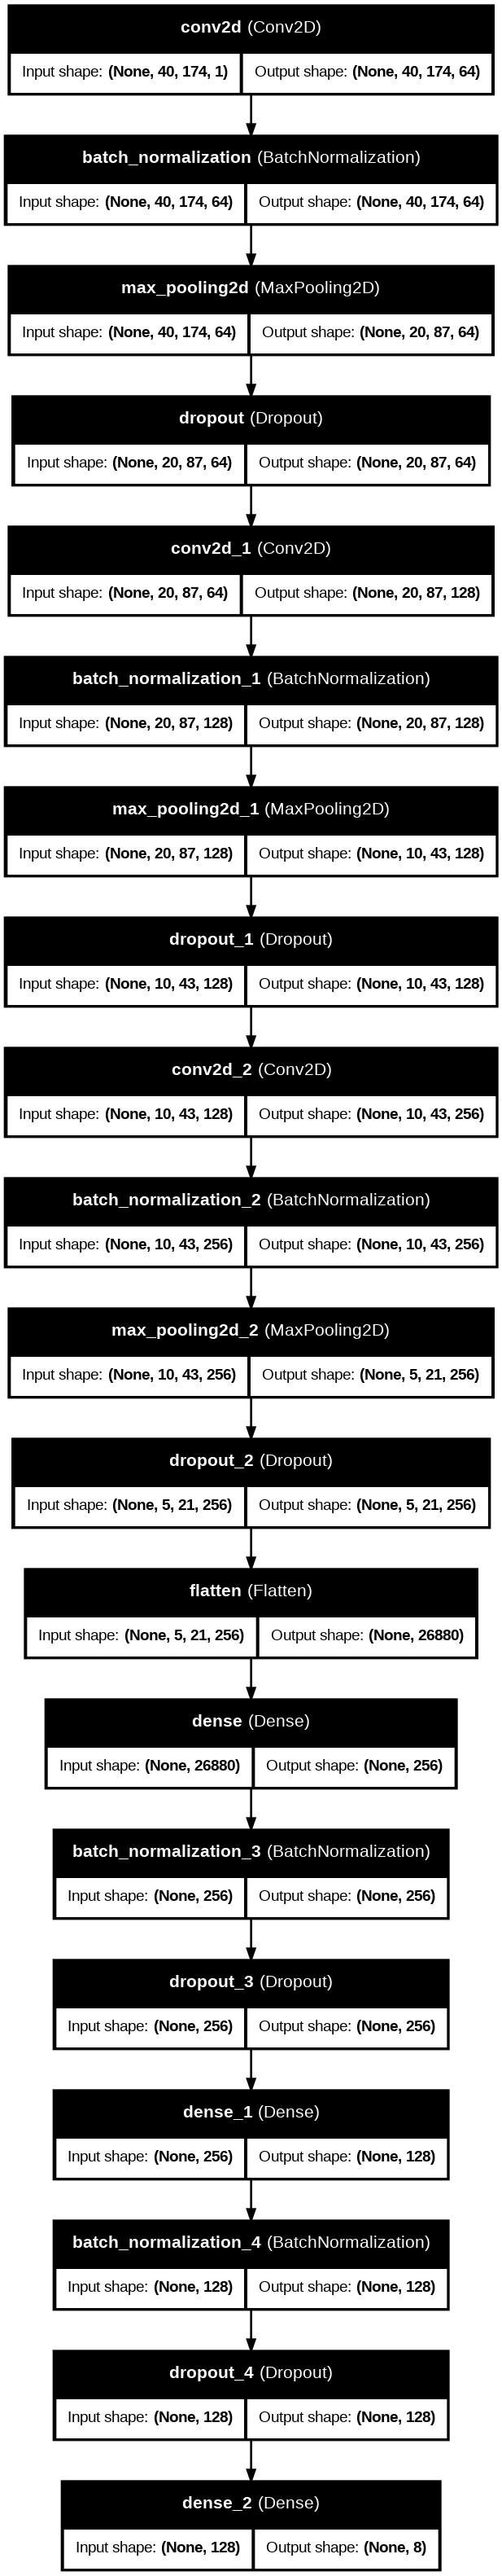


MODEL EXPLANATION FOR BEGINNERS

1. Conv2D Layers: Extract patterns from audio features (like edges in images)
2. BatchNormalization: Normalizes data between layers for stable training
3. MaxPooling2D: Reduces size while keeping important information
4. Dropout: Randomly turns off neurons to prevent overfitting
5. Flatten: Converts 2D data to 1D for Dense layers
6. Dense Layers: Learns complex combinations of features
7. Output Layer: Produces probabilities for each emotion (8 classes)

The model learns to recognize patterns in audio that correspond to emotions!



In [14]:
# CHUNK 5: BUILD THE CNN MODEL
# =============================
# Create a Convolutional Neural Network for emotion classification

def build_emotion_model(input_shape, num_classes):
    """
    Build a CNN model for speech emotion recognition

    Architecture:
    - 3 Convolutional blocks (Conv2D + BatchNorm + MaxPooling + Dropout)
    - Flatten layer
    - 2 Dense layers with dropout
    - Output layer with softmax activation
    """
    model = keras.Sequential([
        # First Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                     input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third Convolutional Block
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        # Output Layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Build the model
input_shape = (X_train_norm.shape[1], X_train_norm.shape[2], 1)
model = build_emotion_model(input_shape, num_classes)

# Display model architecture
print("=" * 60)
print("MODEL ARCHITECTURE")
print("=" * 60)
model.summary()

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n✓ Model built and compiled successfully!")
print(f"✓ Total parameters: {model.count_params():,}")

# Visualize model architecture
keras.utils.plot_model(
    model,
    to_file='/content/model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    dpi=96
)

from IPython.display import Image
print("\n✓ Model architecture diagram:")
display(Image('/content/model_architecture.png'))

print("\n" + "=" * 60)
print("MODEL EXPLANATION FOR BEGINNERS")
print("=" * 60)
print("""
1. Conv2D Layers: Extract patterns from audio features (like edges in images)
2. BatchNormalization: Normalizes data between layers for stable training
3. MaxPooling2D: Reduces size while keeping important information
4. Dropout: Randomly turns off neurons to prevent overfitting
5. Flatten: Converts 2D data to 1D for Dense layers
6. Dense Layers: Learns complex combinations of features
7. Output Layer: Produces probabilities for each emotion (8 classes)

The model learns to recognize patterns in audio that correspond to emotions!
""")

STARTING TRAINING

This will take several minutes...
Watch the accuracy and loss metrics!

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1662 - loss: 2.9221
Epoch 1: val_accuracy improved from -inf to 0.13194, saving model to /content/best_emotion_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.1670 - loss: 2.9186 - val_accuracy: 0.1319 - val_loss: 3.6062 - learning_rate: 0.0010
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2738 - loss: 2.3782
Epoch 2: val_accuracy improved from 0.13194 to 0.15278, saving model to /content/best_emotion_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.2736 - loss: 2.3790 - val_accuracy: 0.1528 - val_loss: 7.9432 - learning_rate: 0.0010
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2779 - loss: 2.1894
Epoch 3: val_accuracy did not improve from 0.15278
36/36 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.2781 - loss: 2.1886 - val_accuracy: 0.1528 - val_loss: 7.7398 - le

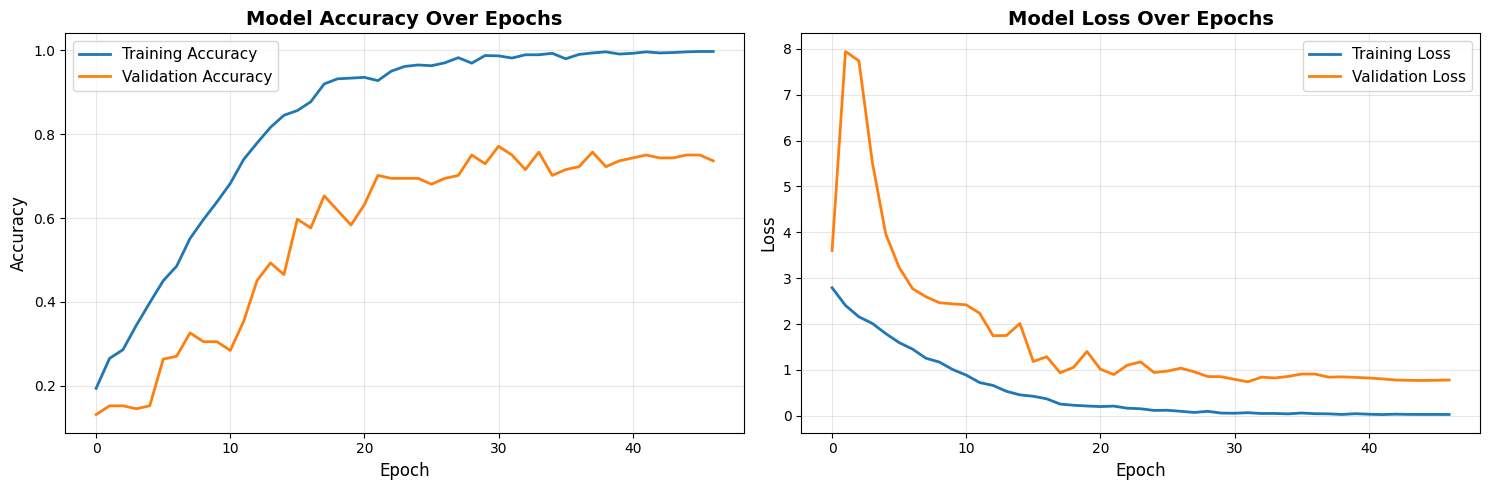


TRAINING RESULTS
Final Training Accuracy:   0.9965 (99.65%)
Final Validation Accuracy: 0.7361 (73.61%)
Best Validation Accuracy:  0.7708 (77.08%)
Total Epochs Trained:      47

✓ Best model loaded and ready for evaluation!


In [15]:
# CHUNK 6: TRAIN THE MODEL
# =========================
# Train the model with callbacks for best performance

# Set up callbacks
callbacks = [
    # Save the best model based on validation accuracy
    keras.callbacks.ModelCheckpoint(
        '/content/best_emotion_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),

    # Reduce learning rate when validation loss plateaus
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),

    # Stop training if no improvement
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )
]

print("=" * 60)
print("STARTING TRAINING")
print("=" * 60)
print("\nThis will take several minutes...")
print("Watch the accuracy and loss metrics!\n")

# Train the model
history = model.fit(
    X_train_norm, y_train,
    batch_size=32,
    epochs=100,  # Will likely stop early due to EarlyStopping
    validation_data=(X_val_norm, y_val),
    callbacks=callbacks,
    verbose=1
)

print("\n✓ Training complete!")

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Get final metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
best_val_acc = max(history.history['val_accuracy'])

print("\n" + "=" * 60)
print("TRAINING RESULTS")
print("=" * 60)
print(f"Final Training Accuracy:   {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
print(f"Best Validation Accuracy:  {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")
print(f"Total Epochs Trained:      {len(history.history['accuracy'])}")
print("=" * 60)

# Load the best model
best_model = keras.models.load_model('/content/best_emotion_model.keras')
print("\n✓ Best model loaded and ready for evaluation!")

EVALUATING ON TEST SET

Test Loss:     0.9077
Test Accuracy: 0.7361 (73.61%)

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

       angry     0.8500    0.8500    0.8500        20
        calm     0.7647    0.6842    0.7222        19
     disgust     0.7222    0.8125    0.7647        16
     fearful     0.7778    0.7368    0.7568        19
       happy     0.9000    0.4500    0.6000        20
     neutral     0.4286    0.7500    0.5455         8
         sad     0.7391    0.7727    0.7556        22
   surprised     0.7083    0.8500    0.7727        20

    accuracy                         0.7361       144
   macro avg     0.7363    0.7383    0.7209       144
weighted avg     0.7619    0.7361    0.7346       144



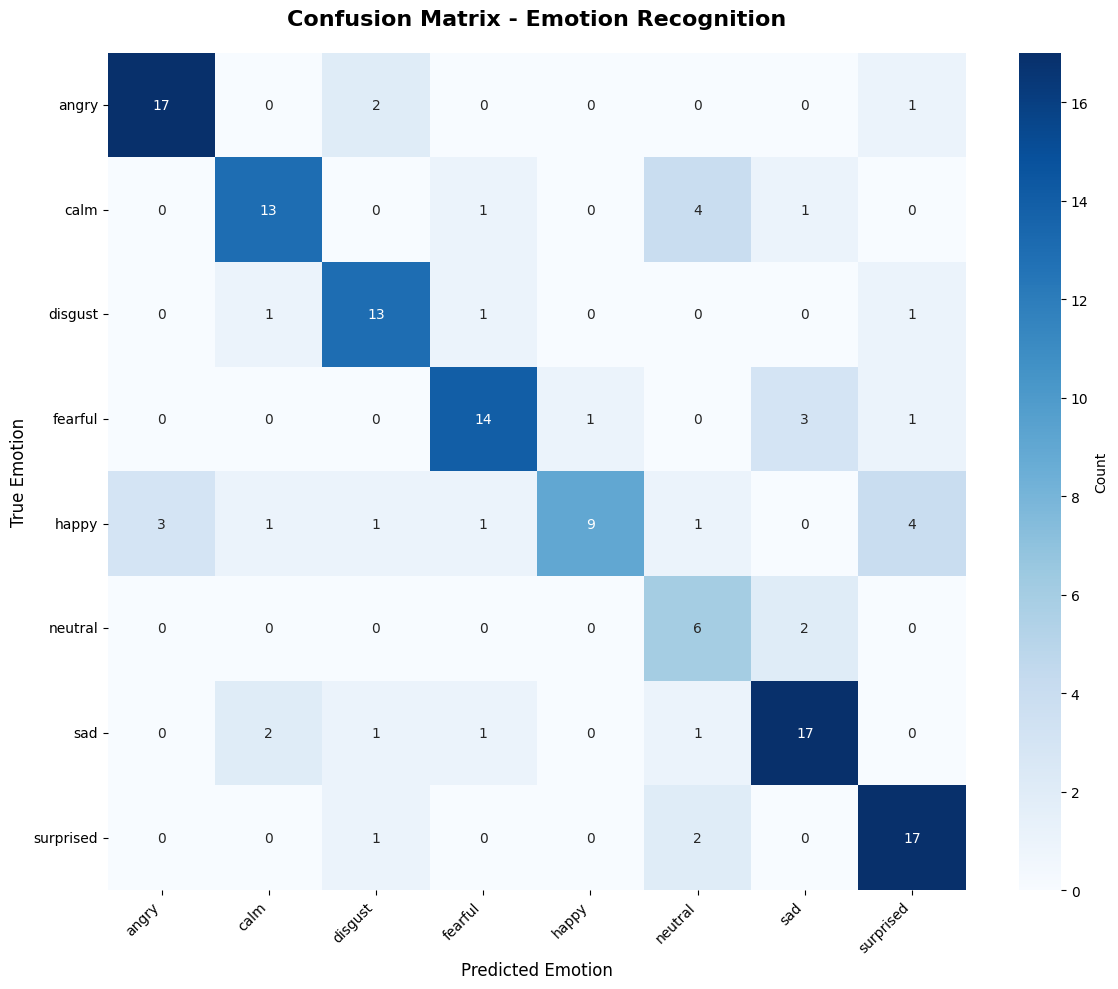


PER-CLASS ACCURACY
angry       : 0.8500 (85.00%)
calm        : 0.6842 (68.42%)
disgust     : 0.8125 (81.25%)
fearful     : 0.7368 (73.68%)
happy       : 0.4500 (45.00%)
neutral     : 0.7500 (75.00%)
sad         : 0.7727 (77.27%)
surprised   : 0.8500 (85.00%)


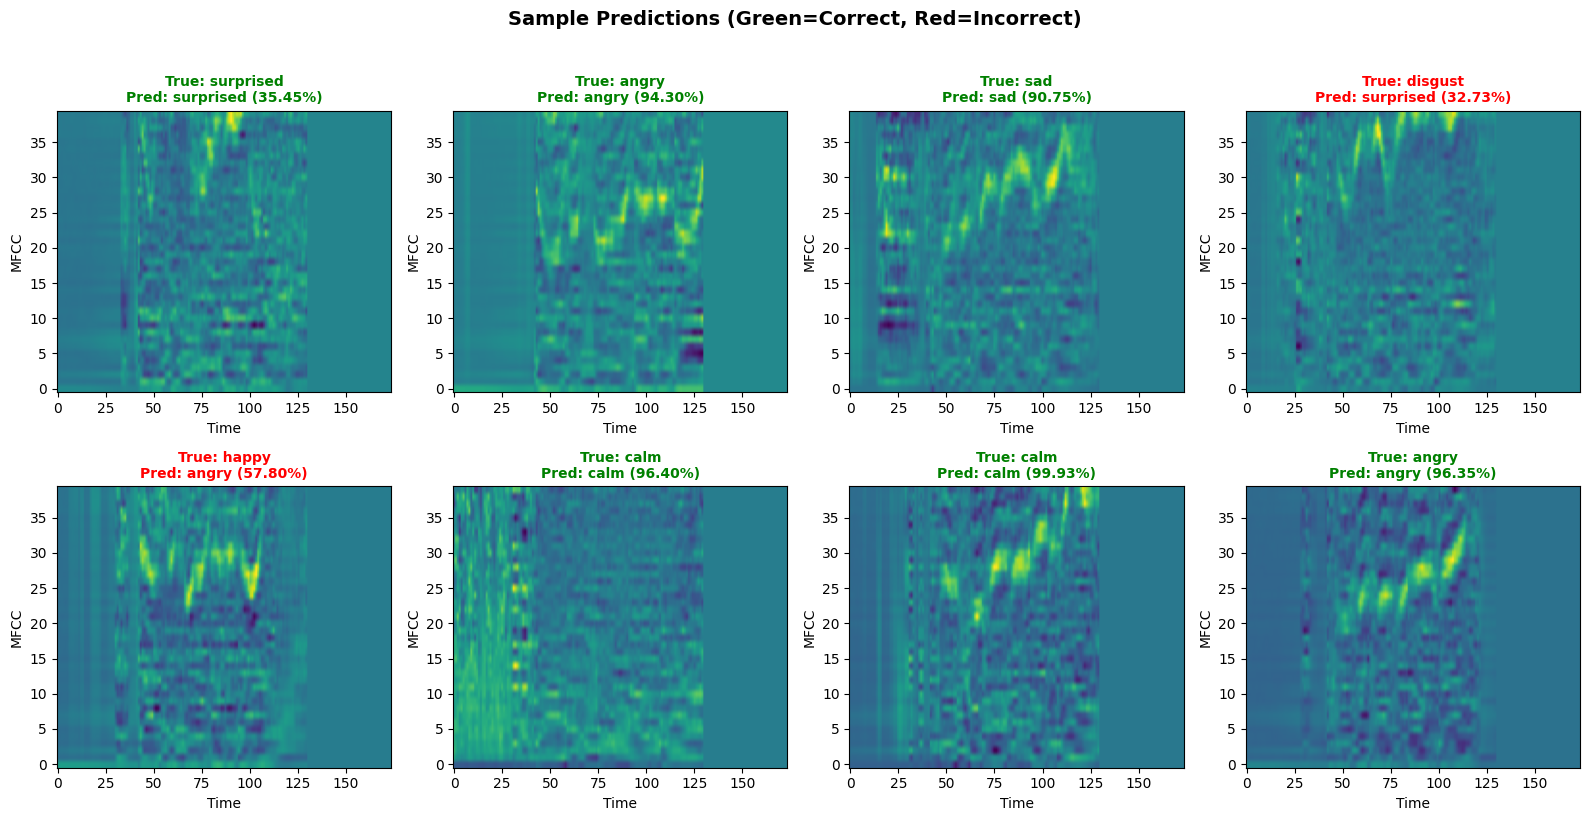


✓ Evaluation complete!
✓ Model is ready for deployment!


In [16]:
# CHUNK 7: MODEL EVALUATION
# ==========================
# Evaluate the model on test set and visualize results

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate on test set
print("=" * 60)
print("EVALUATING ON TEST SET")
print("=" * 60)

test_loss, test_accuracy = best_model.evaluate(X_test_norm, y_test, verbose=0)
print(f"\nTest Loss:     {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Get predictions
y_pred = best_model.predict(X_test_norm, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification Report
print("\n" + "=" * 60)
print("DETAILED CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(
    y_test_classes,
    y_pred_classes,
    target_names=label_encoder.classes_,
    digits=4
))

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
    cbar_kws={'label': 'Count'}
)
plt.title('Confusion Matrix - Emotion Recognition', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Emotion', fontsize=12)
plt.xlabel('Predicted Emotion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('/content/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Per-class accuracy
print("\n" + "=" * 60)
print("PER-CLASS ACCURACY")
print("=" * 60)
for i, emotion in enumerate(label_encoder.classes_):
    mask = y_test_classes == i
    if mask.sum() > 0:
        class_acc = accuracy_score(y_test_classes[mask], y_pred_classes[mask])
        print(f"{emotion:12s}: {class_acc:.4f} ({class_acc*100:.2f}%)")

# Visualize some predictions
num_samples = 8
random_indices = np.random.choice(len(X_test_norm), num_samples, replace=False)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, ax in zip(random_indices, axes):
    # Get prediction
    pred_probs = best_model.predict(X_test_norm[idx:idx+1], verbose=0)[0]
    pred_class = np.argmax(pred_probs)
    true_class = y_test_classes[idx]

    pred_emotion = label_encoder.classes_[pred_class]
    true_emotion = label_encoder.classes_[true_class]
    confidence = pred_probs[pred_class]

    # Plot MFCC
    mfcc_sample = X_test_norm[idx, :, :, 0]
    im = ax.imshow(mfcc_sample, aspect='auto', origin='lower', cmap='viridis')

    # Color based on correct/incorrect
    color = 'green' if pred_class == true_class else 'red'

    ax.set_title(
        f"True: {true_emotion}\nPred: {pred_emotion} ({confidence:.2%})",
        fontsize=10,
        color=color,
        fontweight='bold'
    )
    ax.set_xlabel('Time')
    ax.set_ylabel('MFCC')

plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('/content/sample_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Evaluation complete!")
print("✓ Model is ready for deployment!")

PREDICTING EMOTION FROM NEW AUDIO

🎤 Audio File: 03-01-04-01-02-01-20.wav
🎭 Predicted Emotion: SAD
💯 Confidence: 99.79%

📊 All Emotion Probabilities:
----------------------------------------
sad          99.79% █████████████████████████████████████████████████
disgust       0.09% 
fearful       0.09% 
neutral       0.02% 
surprised     0.01% 
calm          0.00% 
angry         0.00% 
happy         0.00% 


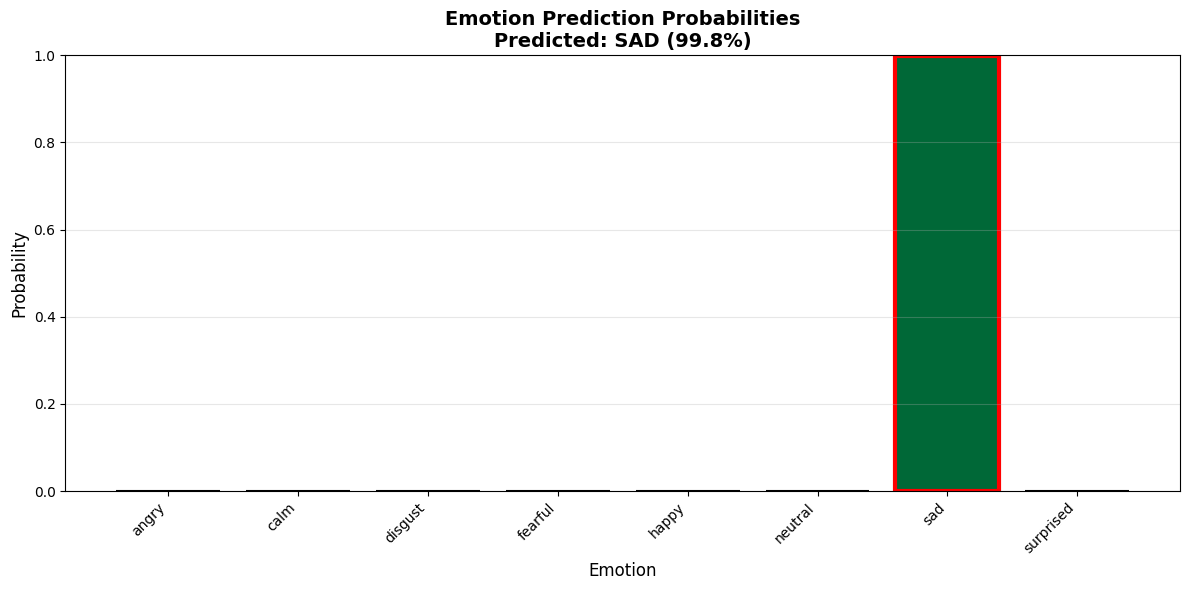


✓ Prediction complete!

TO USE WITH YOUR OWN AUDIO:

1. Upload your audio file to Colab
2. Set: test_audio_path = "/content/your_audio.wav"
3. Run: predict_emotion(test_audio_path, best_model, label_encoder)

Supported formats: WAV, MP3, FLAC, OGG



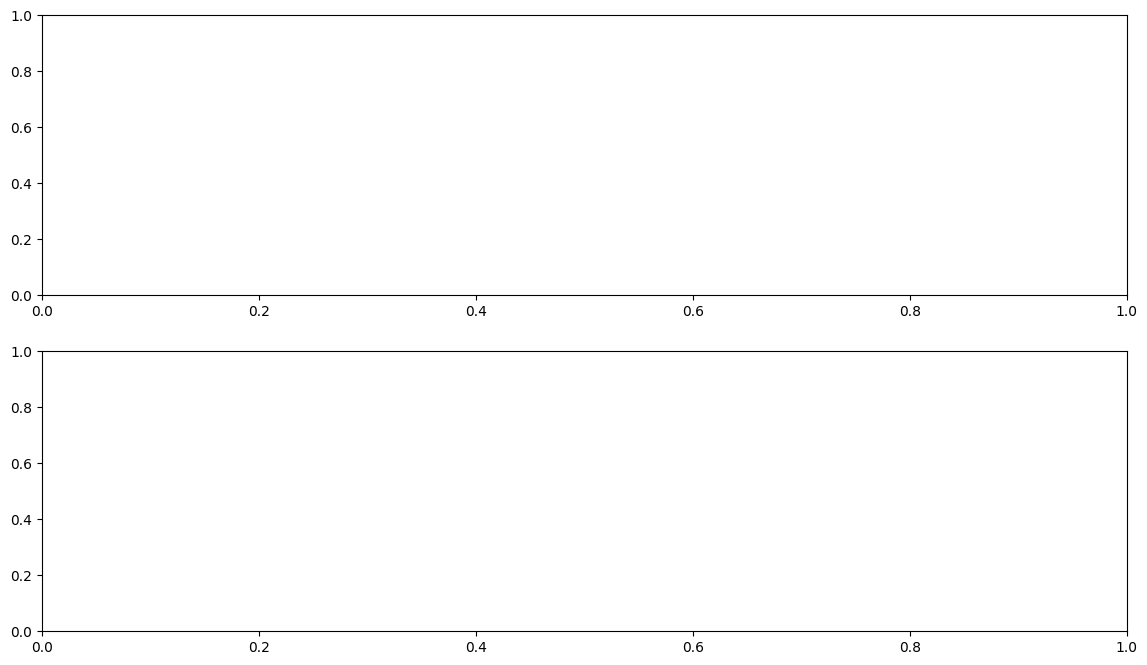

In [19]:
# CHUNK 8: PREDICT EMOTION FROM NEW AUDIO
# =========================================
# Use the trained model to predict emotions from new audio files

def predict_emotion(audio_path, model, label_encoder):
    """
    Predict emotion from an audio file

    Parameters:
    - audio_path: path to audio file
    - model: trained Keras model
    - label_encoder: fitted LabelEncoder

    Returns:
    - predicted emotion, confidence, all probabilities
    """
    # Extract features
    mfcc = extract_mfcc(audio_path)

    if mfcc is None:
        return None, None, None

    # Reshape and normalize
    mfcc_reshaped = mfcc.reshape(1, mfcc.shape[0], mfcc.shape[1], 1)
    mfcc_normalized = (mfcc_reshaped - mean) / std

    # Predict
    predictions = model.predict(mfcc_normalized, verbose=0)[0]
    predicted_class = np.argmax(predictions)
    predicted_emotion = label_encoder.classes_[predicted_class]
    confidence = predictions[predicted_class]

    return predicted_emotion, confidence, predictions

# Test on a random sample from test set
test_idx = np.random.randint(0, len(X_test_norm))
test_audio_path = audio_paths[test_idx]  # Note: You need to track original paths

print("=" * 60)
print("PREDICTING EMOTION FROM NEW AUDIO")
print("=" * 60)

# If you have a new audio file, upload it and use this:
# test_audio_path = "/content/your_audio.wav"

emotion, confidence, probabilities = predict_emotion(
    test_audio_path,
    best_model,
    label_encoder
)

if emotion:
    print(f"\n🎤 Audio File: {os.path.basename(test_audio_path)}")
    print(f"🎭 Predicted Emotion: {emotion.upper()}")
    print(f"💯 Confidence: {confidence:.2%}")

    print("\n📊 All Emotion Probabilities:")
    print("-" * 40)

    # Sort by probability
    sorted_indices = np.argsort(probabilities)[::-1]
    for idx in sorted_indices:
        emotion_name = label_encoder.classes_[idx]
        prob = probabilities[idx]
        bar = "█" * int(prob * 50)
        print(f"{emotion_name:12s} {prob:6.2%} {bar}")

    # Visualize probabilities
    plt.figure(figsize=(12, 6))

    # Bar plot
    colors = plt.cm.RdYlGn(probabilities / probabilities.max())
    bars = plt.bar(label_encoder.classes_, probabilities, color=colors, edgecolor='black', linewidth=1.5)

    # Highlight predicted emotion
    max_idx = np.argmax(probabilities)
    bars[max_idx].set_edgecolor('red')
    bars[max_idx].set_linewidth(3)

    plt.title(f'Emotion Prediction Probabilities\nPredicted: {emotion.upper()} ({confidence:.1%})',
              fontsize=14, fontweight='bold')
    plt.xlabel('Emotion', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('/content/emotion_prediction.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Load and visualize the audio
    audio, sr = librosa.load(test_audio_path, duration=3)

    fig, axes = plt.subplots(2, 1, figsize=(14, 8))



print("\n✓ Prediction complete!")
print("\n" + "=" * 60)
print("TO USE WITH YOUR OWN AUDIO:")
print("=" * 60)
print("""
1. Upload your audio file to Colab
2. Set: test_audio_path = "/content/your_audio.wav"
3. Run: predict_emotion(test_audio_path, best_model, label_encoder)

Supported formats: WAV, MP3, FLAC, OGG
""")

In [20]:
# CHUNK 9: SAVE AND EXPORT MODEL
# ================================
# Save the model for future use and deployment

import pickle
import json

print("=" * 60)
print("SAVING MODEL AND ARTIFACTS")
print("=" * 60)

# 1. Save the trained model
model_path = '/content/emotion_recognition_model.keras'
best_model.save(model_path)
print(f"✓ Model saved to: {model_path}")

# 2. Save the label encoder
with open('/content/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
print("✓ Label encoder saved")

# 3. Save normalization parameters
normalization_params = {
    'mean': mean.tolist(),
    'std': std.tolist()
}
with open('/content/normalization_params.json', 'w') as f:
    json.dump(normalization_params, f)
print("✓ Normalization parameters saved")

# 4. Save model configuration
model_config = {
    'input_shape': input_shape,
    'num_classes': num_classes,
    'emotion_labels': label_encoder.classes_.tolist(),
    'test_accuracy': float(test_accuracy),
    'mfcc_coefficients': 40,
    'max_pad_length': 174
}
with open('/content/model_config.json', 'w') as f:
    json.dump(model_config, f, indent=2)
print("✓ Model configuration saved")

# 5. Create a deployment package
print("\n📦 Creating deployment package...")

# Function to load and use the model (for deployment)
deployment_code = '''
# EMOTION RECOGNITION - DEPLOYMENT CODE
# ======================================
# Use this code to load and run predictions with your trained model

import numpy as np
import librosa
import tensorflow as tf
import pickle
import json

# Load model and artifacts
model = tf.keras.models.load_model('emotion_recognition_model.keras')

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

with open('normalization_params.json', 'r') as f:
    norm_params = json.load(f)
    mean = np.array(norm_params['mean'])
    std = np.array(norm_params['std'])

def extract_mfcc(file_path, max_pad_len=174):
    """Extract MFCC features from audio"""
    audio, sr = librosa.load(file_path, duration=3, sr=22050)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)

    if mfcc.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]

    return mfcc

def predict_emotion(audio_path):
    """Predict emotion from audio file"""
    # Extract features
    mfcc = extract_mfcc(audio_path)
    mfcc_reshaped = mfcc.reshape(1, mfcc.shape[0], mfcc.shape[1], 1)
    mfcc_normalized = (mfcc_reshaped - mean) / std

    # Predict
    predictions = model.predict(mfcc_normalized, verbose=0)[0]
    predicted_class = np.argmax(predictions)
    emotion = label_encoder.classes_[predicted_class]
    confidence = predictions[predicted_class]

    return emotion, confidence, predictions

# Example usage:
# emotion, confidence, probs = predict_emotion("your_audio.wav")
# print(f"Emotion: {emotion}, Confidence: {confidence:.2%}")
'''

with open('/content/deployment_code.py', 'w') as f:
    f.write(deployment_code)
print("✓ Deployment code created")

# 6. Download all files
from google.colab import files

print("\n" + "=" * 60)
print("DOWNLOAD FILES")
print("=" * 60)
print("Run these commands to download your model:\n")

download_commands = """
# Download model files
files.download('/content/emotion_recognition_model.keras')
files.download('/content/label_encoder.pkl')
files.download('/content/normalization_params.json')
files.download('/content/model_config.json')
files.download('/content/deployment_code.py')

# Download training artifacts
files.download('/content/training_history.png')
files.download('/content/confusion_matrix.png')
files.download('/content/model_architecture.png')
"""

print(download_commands)

# Create a README file
readme_content = f"""
# Speech Emotion Recognition Model

## Model Information
- **Test Accuracy**: {test_accuracy:.2%}
- **Number of Emotions**: {num_classes}
- **Emotions**: {', '.join(label_encoder.classes_)}
- **Architecture**: CNN (Convolutional Neural Network)
- **Input**: MFCC features from audio

## Files Included
1. `emotion_recognition_model.keras` - Trained model
2. `label_encoder.pkl` - Label encoder for emotion classes
3. `normalization_params.json` - Mean and std for feature normalization
4. `model_config.json` - Model configuration details
5. `deployment_code.py` - Ready-to-use prediction code

## How to Use

### Installation
```bash
pip install tensorflow librosa numpy
```

### Quick Start
```python
from deployment_code import predict_emotion

emotion, confidence, probabilities = predict_emotion("your_audio.wav")
print(f"Predicted Emotion: {{emotion}}")
print(f"Confidence: {{confidence:.2%}}")
```

## Model Performance
- Training completed in {len(history.history['accuracy'])} epochs
- Best validation accuracy: {max(history.history['val_accuracy']):.2%}
- Test accuracy: {test_accuracy:.2%}

## Requirements
- Python 3.7+
- TensorFlow 2.x
- librosa
- numpy
- scikit-learn

## Notes
- Audio files should be in WAV, MP3, or similar formats
- Model expects audio of approximately 3 seconds
- Works best with clear speech recordings

Created using Google Colab
Date: {pd.Timestamp.now().strftime('%Y-%m-%d')}
"""

with open('/content/README.md', 'w') as f:
    f.write(readme_content)
print("\n✓ README.md created")

print("\n" + "=" * 60)
print("MODEL SUMMARY")
print("=" * 60)
print(f"✓ Model Type: Convolutional Neural Network (CNN)")
print(f"✓ Test Accuracy: {test_accuracy:.2%}")
print(f"✓ Emotions Recognized: {num_classes}")
print(f"✓ Total Parameters: {best_model.count_params():,}")
print(f"✓ All files saved successfully!")
print("\n🎉 Your emotion recognition model is ready!")
print("=" * 60)

SAVING MODEL AND ARTIFACTS
✓ Model saved to: /content/emotion_recognition_model.keras
✓ Label encoder saved
✓ Normalization parameters saved
✓ Model configuration saved

📦 Creating deployment package...
✓ Deployment code created

DOWNLOAD FILES
Run these commands to download your model:


# Download model files
files.download('/content/emotion_recognition_model.keras')
files.download('/content/label_encoder.pkl')
files.download('/content/normalization_params.json')
files.download('/content/model_config.json')
files.download('/content/deployment_code.py')

# Download training artifacts
files.download('/content/training_history.png')
files.download('/content/confusion_matrix.png')
files.download('/content/model_architecture.png')


✓ README.md created

MODEL SUMMARY
✓ Model Type: Convolutional Neural Network (CNN)
✓ Test Accuracy: 73.61%
✓ Emotions Recognized: 8
✓ Total Parameters: 7,288,456
✓ All files saved successfully!

🎉 Your emotion recognition model is ready!


In [21]:
!mkdir /content/emotion_project

In [22]:
!cp *.ipynb /content/emotion_project/

cp: cannot stat '*.ipynb': No such file or directory
